# Experiments :)

In [2]:
from utils import *
from bbq.polynomial import Polynomial
from bbq.bbq_code import BivariateBicycle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Polygon
import galois
from scipy.sparse import coo_matrix, hstack
# from ldpc import bdosd_decoder

## Tanner Graphs

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


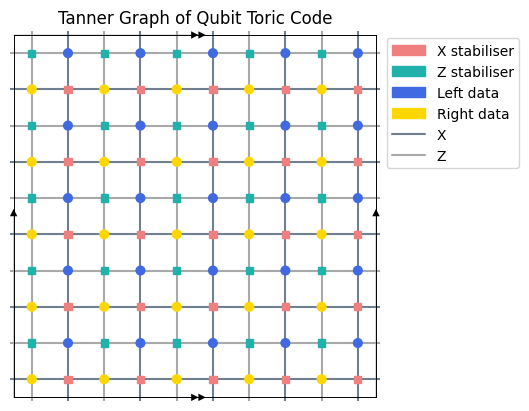

In [2]:
# Qubit Toric code
 
a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1, 'Qubit Toric Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

c:\Users\elean\Documents\Quantum Computing PhD\ITP\IP BBQ\qudit-bivariate-bicycle\qudit-bb\bbq.py:66: ValueWarning: No X logicals found for these parameters.
  warnings.warn("No X logicals found for these parameters.", ValueWarning)
c:\Users\elean\Documents\Quantum Computing PhD\ITP\IP BBQ\qudit-bivariate-bicycle\qudit-bb\bbq.py:68: ValueWarning: No Z logicals found for these parameters.
  warnings.warn("No Z logicals found for these parameters.", ValueWarning)


Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 4x^1y^0 + 0x^1y^1
b(x, y) = 3x^0y^0 + 4x^0y^1 + 0x^1y^0 + 0x^1y^1


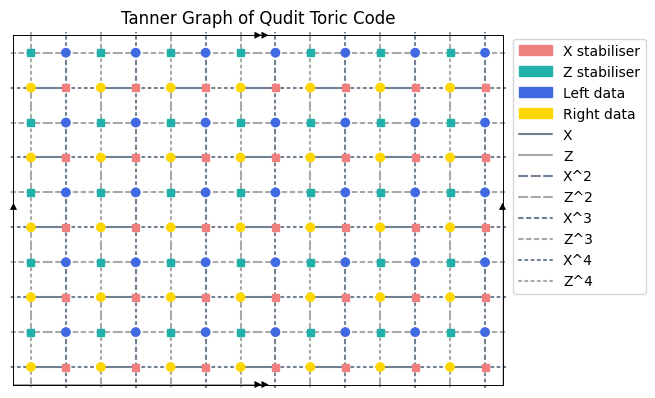

In [3]:
# Qudit Toric code
 
a = Polynomial(5, np.array([[1, 0], [4, 0]]))
b = Polynomial(5, np.array([[3, -1], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 7, 2, 'Qudit Toric Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2


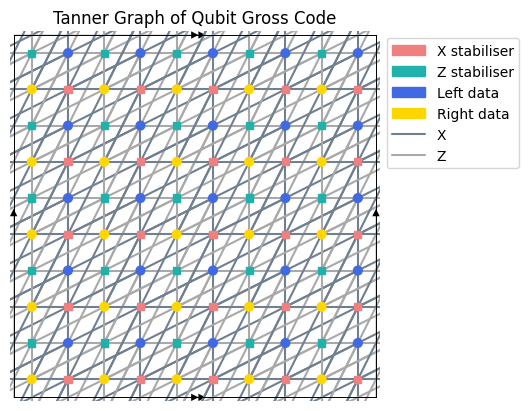

In [4]:
# Qubit Gross code

a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1, 'Qubit Gross Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

c:\Users\elean\Documents\Quantum Computing PhD\ITP\IP BBQ\qudit-bivariate-bicycle\qudit-bb\bbq.py:66: ValueWarning: No X logicals found for these parameters.
  warnings.warn("No X logicals found for these parameters.", ValueWarning)
c:\Users\elean\Documents\Quantum Computing PhD\ITP\IP BBQ\qudit-bivariate-bicycle\qudit-bb\bbq.py:68: ValueWarning: No Z logicals found for these parameters.
  warnings.warn("No Z logicals found for these parameters.", ValueWarning)


Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 2x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 2x^3y^0 + 0x^3y^1 + 0x^3y^2


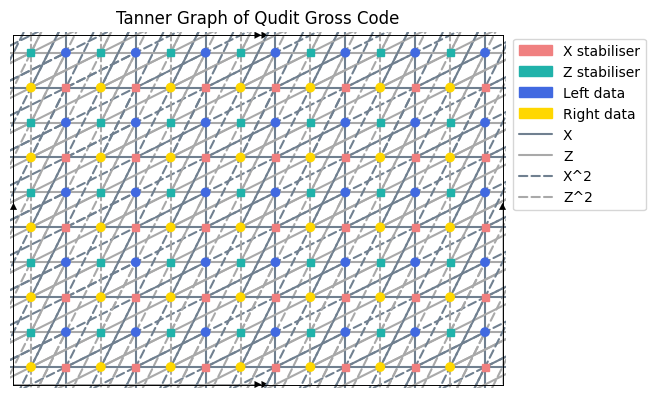

In [5]:
# Qudit Gross code

a = Polynomial(3, np.array([[0, 0, 0, 2], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(3, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [2, 0, 0]]))
bb = BivariateBicycle(a, b, 5, 7, 1, 'Qudit Gross Code')
print(bb)
# print(bb.hx)
# print(bb.hz)
bb.draw()

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 2x^0y^2 + 0x^0y^3 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3 + 0x^3y^0 + 2x^3y^1 + 0x^3y^2 + 0x^3y^3
b(x, y) = 0x^0y^0 + 2x^0y^1 + 0x^0y^2 + 0x^0y^3 + 0x^1y^0 + 0x^1y^1 + 1x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
[[1 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 1 0 0 0]
 [0 1 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 1 0 0]
 [2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 1 0]
 [2 2 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 1 2 2 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0]
 [0 0 0 0 0 1 2 2 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1]
 [0 0 0 0 2 0 1 2 0 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0]
 [0 0 0 0 2 2 0 1 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 2 2 0 0 0 1 0 1 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 1 2 2 0 0 0 1 0 1 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 2 0 1 2 1 0 0 0 0 0 1 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 2 2 0 1 0 1 0 0 0 0 0 1 2 0 0 0]]
[[0 0 0 1 2 0 0 0 0 0 2 0 1 0 2 2 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 2

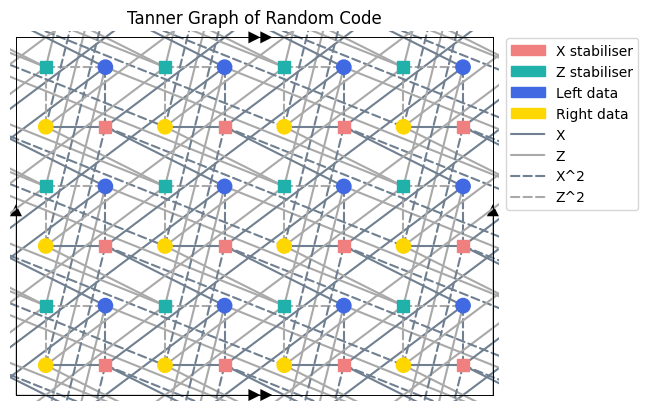

In [6]:
# Random code

b = Polynomial(3, np.array([[0, 2, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]]))
a = Polynomial(3, np.array([[1, 0, 2, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 2, 0, 0]]))
bb = BivariateBicycle(a, b, 3, 4, 2, 'Random Code')
print(bb)
print(bb.hx)
print(bb.hz)
bb.draw()

## Simulation

#### BP Decoder

In [ ]:
def simulate(self, iterations, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z):
    """Simulate the code for given iterations.
    
    Parameters
    ----------
    iterations : int
        The number of iterations.
    hx_eff : nd.array
        The effective X parity check matrix.
    short_hx_eff : nd.array
        The effective X parity check matrix without logicals.
    hz_eff : nd.array
        The effective Z parity check matrix.
    short_hz_eff : nd.array
        The effective Z parity check matrix without logicals.
    channel_prob_x : list
        The probability of each X error mechanism.
    channel_prob_z : list
        The probability of each Z error mechanism.

    Returns
    -------
    success_rate : float
        The proportion of successful runs of the simulation.
    """
    pass

def bp_decode(self, syndrome, prior, h_eff, m_iter):
    """Decode the syndrome using BP.
    
    Parameters
    ----------
    syndrome : nd.array
        The syndrome of the error.
    prior : list
        The probability of each error mechanism.
    h_eff : nd.array
        The effective parity check matrix, where columns = error mechanism and rows = syndrome (flagged stabilisers).
    m_iter : int
        The maximum number of iterations.

    Returns
    -------
    error : nd.array
        The error.
    success : bool
        Whether the decoding was successful.
    """
    if not isinstance(syndrome, np.ndarray):
        raise TypeError('syndrome must be a numpy array')
    if not isinstance(prior, list):
        raise TypeError('prior must be a list')
    if not (isinstance(m_iter, int) and m_iter > 0):
        raise ValueError('m_iter must be a positive integer')

    qubits_dict = self.qubits_dict
    data_qubits, x_checks, z_checks = self.data_qubits, self.x_checks, self.z_checks

    # Step 0: initialisation
    # Q[k, i] is the message passed from error k to check i
    Q = np.zeros(())
    # P[i, k] is the message passed from check i to error k

    # Step 1: pass check to error messages
    # Step 2: pass error to check messages
    # Step 3: calculate posterior and make hard decision on errors
    # Step 4: check convergence or terminate

def _check_to_error_message(self, Q):
    """Pass messages from check nodes to error nodes.
    
    Parameters
    ----------
    Q : nd.array
        Q[k, i] is the message passed from error k to check i.

    Returns
    -------
    P : nd.array
        P[i, k] is the message passed from check i to error k.
    """
    pass

def _error_to_check_message(self, P):
    """Pass messages from error nodes to check nodes.
    
    Parameters
    ----------
    P : nd.array
        P[i, k] is the message passed from check i to error k.

    Returns
    -------
    Q : nd.array
        Q[k, i] is the message passed from error k to check i.
    """
    pass

def _calculate_posterior(self, P):
    """Calculate the posterior probability of the error.
    
    Parameters
    ----------
    P : nd.array
        P[i, k] is the message passed from check i to error k.

    Returns
    -------
    error : nd.array
        The error.
    """
    pass

#### D+OSD

In [3]:
def simulate(self, iterations, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=False):
    """Simulate the code for given iterations.
    
    Parameters
    ----------
    iterations : int
        The number of iterations of the simulation.
    circ : list
        The syndrome measurement circuit.
    error_rates : dict
        Dictionary with error rates with keys ['Meas', 'Prep', 'Idle', 'CNOT'].
    num_cycles : int
        Number of cycles to repeat the syndrome circuit.
    hx_eff : nd.array
        The effective X parity check matrix.
    short_hx_eff : nd.array
        The effective X parity check matrix without logicals.
    hz_eff : nd.array
        The effective Z parity check matrix.
    short_hz_eff : nd.array
        The effective Z parity check matrix without logicals.
    channel_prob_x : list
        The probability of each X error mechanism.
    channel_prob_z : list
        The probability of each Z error mechanism.

    Returns
    -------
    float
        Logical error rate.
    """
    field = self.field
    l, m = self.l, self.m
    qubits_dict = self.qubits_dict
    data_qubits = self.data_qubits
    x_checks, z_checks = self.x_checks, self.z_checks
    x_logicals, z_logicals = self.x_logicals, self.z_logicals
    hx_eff, hz_eff = hx_eff.toarray(), hz_eff.toarray()
    short_hx_eff, short_hz_eff = short_hx_eff.toarray(), short_hz_eff.toarray()
    first_logical_row = l * m * (num_cycles + 2)
    k = len(x_logicals)

    # Set up priors
    x_prior = np.zeros((len(channel_prob_x), field), dtype=int)
    z_prior = np.zeros((len(channel_prob_z), field), dtype=int)

    for i, prob in enumerate(channel_prob_x):
        x_prior[i, 0] = 1 - prob
        for j in range(1, field):
            x_prior[i, j] = prob / (field - 1)
    for i, prob in enumerate(channel_prob_z):
        z_prior[i, 0] = 1 - prob
        for j in range(1, field):
            z_prior[i, j] = prob / (field - 1)

    # Run for given number of iterations
    success_count = 0
    for _ in range(iterations):

        # Generate noisy circuit
        noisy_circ, err_cnt = self._generate_noisy_circuit(circ * num_cycles, error_rates)
        if verbose:
            print(f'Number of errors: {err_cnt}')

        # Run X decoding and Z decosing sequentially
        x_success, z_success = False, False

        # Correct X errors
        x_syndrome_history, x_state, x_syndrome_map, x_err_count = self._simulate_x_circuit(noisy_circ + circ + circ)
        # print(f'x_syndrome_history: {x_syndrome_history}')
        x_state_data_qubits = [x_state[qubits_dict[qubit]] for qubit in data_qubits]
        x_syndrome_final_logical = (np.array(x_logicals) @ x_state_data_qubits) % field
        # Syndrome sparsification
        x_syndrome_history_copy = x_syndrome_history.copy()
        for check in z_checks:
            pos = x_syndrome_map[check]
            assert len(pos) == num_cycles + 2
            for row in range(1, num_cycles + 2):
                x_syndrome_history[pos[row]] += x_syndrome_history_copy[pos[row-1]]
        x_syndrome_history %= field
        x_error = dijkstra_osd_decode(self, x_syndrome_history, x_prior, short_hx_eff)

        # Check logical effect
        x_syndrome_history_augmented_guessed = (hx_eff @ x_error) % field
        x_syndrome_final_logical_guessed = x_syndrome_history_augmented_guessed[first_logical_row: first_logical_row + k]
        x_success = np.array_equal(x_syndrome_final_logical_guessed, x_syndrome_final_logical)

        # Correct Z errors
        if x_success:
            z_syndrome_history, z_state, z_syndrome_map, z_err_count = self._simulate_z_circuit(noisy_circ + circ + circ)
            # print(f'z_syndrome_history: {z_syndrome_history}')
            z_state_data_qubits = [z_state[qubits_dict[qubit]] for qubit in data_qubits]
            z_syndrome_final_logical = (np.array(z_logicals) @ z_state_data_qubits) % field
            # Syndrome sparsification
            z_syndrome_history_copy = z_syndrome_history.copy()
            for check in x_checks:
                pos = z_syndrome_map[check]
                assert len(pos) == num_cycles + 2
                for row in range(1, num_cycles + 2):
                    z_syndrome_history[pos[row]] += z_syndrome_history_copy[pos[row-1]]
            z_syndrome_history %= field
            z_error = dijkstra_osd_decode(self, z_syndrome_history, z_prior, short_hz_eff)

            # Check logical effect
            z_syndrome_history_augmented_guessed = (hz_eff @ z_error) % field
            z_syndrome_final_logical_guessed = z_syndrome_history_augmented_guessed[first_logical_row: first_logical_row + k]
            z_success = np.array_equal(z_syndrome_final_logical_guessed, z_syndrome_final_logical)

        # Check if the decoding was successful
        success = x_success and z_success

        if success:
            success_count += 1

    return 1 - (success_count / iterations)

In [4]:
def dijkstra_osd_decode(self, syndrome_history, prior, h_eff, debug = False):
    """Decode the syndrome using D+OSD.
    
    Parameters
    ----------
    syndrome_history : nd.array
        The syndrome of the error.
    prior : nd.array
        The probability of each error mechanism.
    h_eff : nd.array
        The effective parity check matrix, where columns = error mechanism and rows = syndrome (flagged stabilisers).

    Returns
    -------
    error : nd.array
        The estimated error.
    success : bool
        Whether the decoding was successful.
    """
    if not isinstance(syndrome_history, np.ndarray):
        raise TypeError('syndrome must be a numpy array')
    if not isinstance(prior, np.ndarray):
        raise TypeError('prior must be a list')

    field = self.field
    qubits_dict = self.qubits_dict
    data_qubits, x_checks, z_checks = self.data_qubits, self.x_checks, self.z_checks

    m, n = h_eff.shape

    # Mini-Dijkstra
    check_distances = np.ones(m) * n
    error_distances = np.ones(n) * n

    # Set the distance each detector is from an error
    for c in syndrome_history.nonzero()[0]:
        check_distances[c] = 0

    update_made = True
    while update_made:
        update_made = False
        for c in range(m):
            current_distance = check_distances[c]
            for e in np.nonzero(h_eff[c])[0]:
                if current_distance + 1 < error_distances[e]:
                    error_distances[e] = current_distance + 1
                    update_made = True

        for e in range(n):
            current_distance = error_distances[e]
            for c in np.nonzero(h_eff[:,e])[0]:
                if current_distance + 1 < check_distances[c]:
                    check_distances[c] = current_distance + 1
                    update_made = True

    certainties = error_distances

    # Sort errors by how certain we are of their values (most to least)
    col_rank_perm = np.argsort(certainties)
    col_rank_inv_perm = np.empty_like(col_rank_perm)
    col_rank_inv_perm[col_rank_perm] = np.arange(len(col_rank_perm))

    # Create Galois field elements
    GF = galois.GF(field)
    
    # Convert H and syndrome to Galois field arrays
    H_gf = GF(h_eff.copy())
    syndrome_gf = GF(syndrome_history.copy())
    
    # Order the columns of h_gf and prior according to the ranking
    H_ordered_gf = H_gf[:, col_rank_perm]
    priors_perm = prior[col_rank_perm]

    # Find the reduced row echelon form (RREF) and identify pivot columns
    H_rref_gf, syndrome_rref_gf, pivot_cols = rref_with_pivots(H_ordered_gf, syndrome_gf)
    m_ind = H_rref_gf.shape[0]
    non_pivot_cols = [i for i in range(n) if i not in pivot_cols]

    # Select the first rank(h_gf) linearly independent columns as basis set in P, others in B
    P = H_rref_gf[:, pivot_cols]
    assert P.shape == (m_ind, m_ind)
    B = H_rref_gf[:, non_pivot_cols]

    def sln_from(g):
        assert g.shape == (n - m_ind,)
        remainder =  syndrome_rref_gf - B @ g
        fix = np.linalg.solve(P, remainder)
        assert (P @ fix + B @ g == syndrome_rref_gf).all()

        score = 0
        sln = GF.Zeros(n)
        # Find prob of basis set
        for i in range(m_ind):
            p = priors_perm[pivot_cols[i],fix[i]]
            sln[pivot_cols[i]] = fix[i]
            if p > 0:
                score += np.log(p)
            else:
                p -= 1000
        
        for i in range(n - m_ind):
            p = priors_perm[non_pivot_cols[i], g[i]]
            sln[non_pivot_cols[i]] = g[i]
            if p > 0:
                score += np.log(p)
            else:
                p -= 1000

        # Check sln makes correct syndrome
        assert (H_rref_gf @ sln == syndrome_rref_gf).all()
        assert (H_gf @ sln[col_rank_inv_perm] == syndrome_gf).all()
    
        return np.array(sln[col_rank_inv_perm]), score

    # OSD_0 solution
    best_solution, best_score = sln_from(GF.Zeros(n - m_ind))
    pivot_col_labels = {col_rank_perm[c]: int(error_distances[col_rank_perm[c]]) for c in pivot_cols}
    
    # print(f'for debugging: {best_solution}, {True}, {[col_rank_perm[i] for i in pivot_cols]}, {pivot_col_labels}')
    
    return best_solution

In [10]:
def rref_with_pivots(A, v, x = None):
    """
    Perform Gaussian elimination to find the reduced row echelon form (RREF).
    Also identifies the pivot columns.
    Also reduces a vector to keep a linear system invariant.
    
    Parameters
    ----------
    A : Galois field array
        Galois field matrix to row reduce
        
    Returns
    -------
    A_rref : Galois field array
        Row-reduced form of A
    pivots : list
        Indices of pivot columns
    """
    # Get a copy to avoid modifying the original
    A_rref = A.copy()
    v_rref = v.copy()
    m, n = A_rref.shape
    assert v.shape == (m,)
    # assert (A_rref @ x == v_rref).all()
    
    # Track the pivot positions
    pivot_cols = []
    pivot_rows = []
    
    # Iterate through columns
    for c in range(n):
        # Find pivot in column c
        for r in range(m):
            if A_rref[r, c] != 0 and r not in pivot_rows:
                break
        else:
            continue

        # Record this column as a pivot column
        pivot_cols.append(c)
        pivot_rows.append(r)
        
        # Scale the pivot row to make the pivot element 1
        pivot = A_rref[r, c]
        A_rref[r] = A_rref[r] / pivot
        v_rref[r] = v_rref[r] / pivot
        
        # Eliminate other elements in the pivot column
        for i in range(m):
            if i != r and A_rref[i, c] != 0:
                v_rref[i] = v_rref[i] - A_rref[i,c] * v_rref[r]
                A_rref[i] = A_rref[i] - A_rref[i, c] * A_rref[r]
        
        # If we've exhausted all rows, we're done
        if len(pivot_rows) == m:
            break
    
    # if len(pivot_rows) < A.shape[0]:
    #     print("Matrix is not full rank.")

    return A_rref[sorted(pivot_rows)], v_rref[sorted(pivot_rows)], pivot_cols

In [6]:
# Testing...

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 4, 4, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.002
num_cycles = 8
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


In [12]:
# BIG threshold graph

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))

x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']

results = []

for d in [3, 5, 7, 9]:
    bb = BivariateBicycle(a, b, d, d, 1)
    num_cycles = d
    for p in np.linspace(0.001, 0.01, 25):
        error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
        circ = bb.construct_sm_circuit(x_order, z_order)
        hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)
        logical_error_rate = simulate(bb, 100, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z)
        results.append([d, p, logical_error_rate])
    print(f'Completed d = {d}')

Completed d = 3


KeyboardInterrupt: 

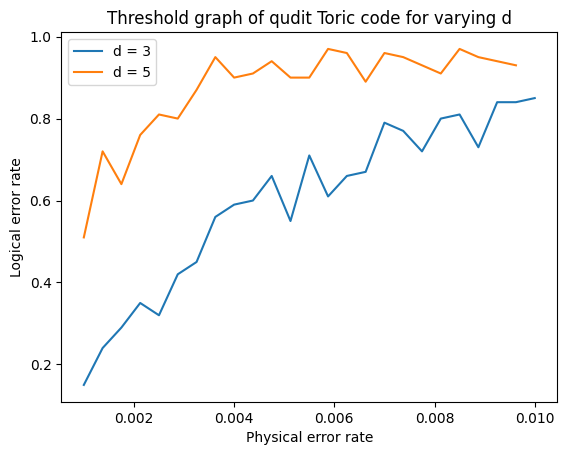

In [41]:
# BIG threshold graph

x = np.linspace(0.001, 0.01, 25)

plt.plot(x, results_3)
plt.plot(x[0:24], results_5)

plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.legend(['d = 3', 'd = 5'])
plt.title('Threshold graph of qudit Toric code for varying d');

In [261]:
simulate(bb, 10, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z, verbose=True)

Number of errors: 0
Number of errors: 2
Number of errors: 1
Number of errors: 10
Number of errors: 5
Number of errors: 8
Number of errors: 3
Number of errors: 3
Number of errors: 3
Number of errors: 7


0.9

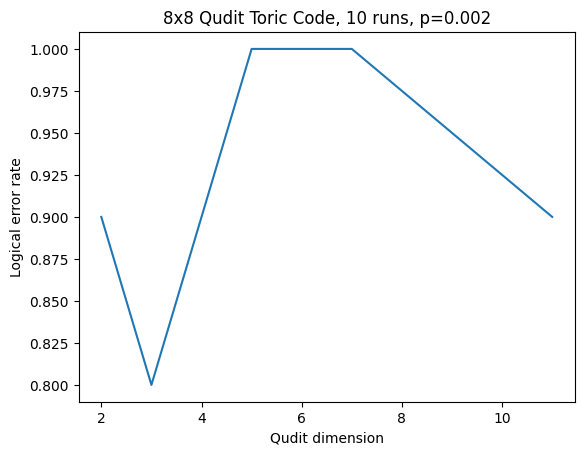

In [ ]:
# Testing qudit dimension

plt.plot([2, 3, 5, 7, 11], [0.9, 0.8, 1.0, 1.0, 0.9])
plt.xlabel('Qudit dimension')
plt.ylabel('Logical error rate')
plt.title('8x8 Qudit Toric Code, 10 runs, p=0.002');

In [241]:
# Threshold graphs

success_rate = []

for p in np.linspace(0.001, 0.01, 10):
    error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
    success_rate.append(simulate(bb, 50, circ, error_rates, num_cycles, hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z))

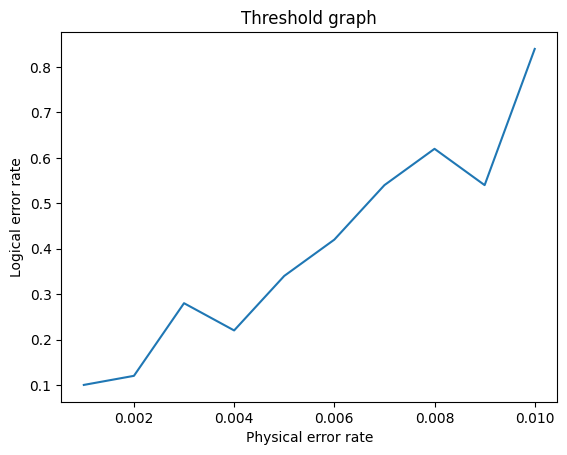

In [ ]:
# qutrit 8x8

plt.plot(np.linspace(0.001, 0.01, 10), success_rate)
plt.xlabel('Physical error rate')
plt.ylabel('Logical error rate')
plt.title('Threshold graph');

In [3]:
# Testing qubit Toric code (takes 3s)

a = Polynomial(2, np.array([[1, 0], [1, 0]]))
b = Polynomial(2, np.array([[1, 1], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.003
num_cycles = 1
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 1x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 1x^0y^1 + 0x^1y^0 + 0x^1y^1


In [3]:
# Testing qudit Toric code (takes 15s)

a = Polynomial(3, np.array([[2, 0], [1, 0]]))
b = Polynomial(3, np.array([[1, 2], [0, 0]]))
bb = BivariateBicycle(a, b, 5, 5, 1)
x_order = ['Idle', 0, 3, 1, 2]
z_order = [0, 3, 1, 2, 'Idle']
p = 0.003
num_cycles = 5
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 2x^0y^0 + 0x^0y^1 + 1x^1y^0 + 0x^1y^1
b(x, y) = 1x^0y^0 + 2x^0y^1 + 0x^1y^0 + 0x^1y^1


In [4]:
# Testing qubit Gross code (takes 23s)

a = Polynomial(2, np.array([[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]]))
b = Polynomial(2, np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0], [1, 0, 0]]))
bb = BivariateBicycle(a, b, 6, 6, 1)
x_order = ['Idle', 1, 4, 3, 5, 0, 2]
z_order = [3, 5, 0, 1, 2, 4, 'Idle']
p = 0.003
num_cycles = 3
error_rates = {'Meas': p, 'Prep': p, 'Idle': p, 'CNOT': p}
print(bb)

qubits_dict, data_qubits, x_checks, z_checks = bb.qubits_dict, bb.data_qubits, bb.x_checks, bb.z_checks
hx, hz = bb.hx, bb.hz
lx, lz = bb.x_logicals, bb.z_logicals
circ = bb.construct_sm_circuit(x_order, z_order)
hx_eff, short_hx_eff, hz_eff, short_hz_eff, channel_prob_x, channel_prob_z = bb.construct_decoding_matrix(circ, error_rates, num_cycles)

Bivariate Bicycle code for
a(x, y) = 0x^0y^0 + 0x^0y^1 + 0x^0y^2 + 1x^0y^3 + 1x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^1y^3 + 1x^2y^0 + 0x^2y^1 + 0x^2y^2 + 0x^2y^3
b(x, y) = 0x^0y^0 + 1x^0y^1 + 1x^0y^2 + 0x^1y^0 + 0x^1y^1 + 0x^1y^2 + 0x^2y^0 + 0x^2y^1 + 0x^2y^2 + 1x^3y^0 + 0x^3y^1 + 0x^3y^2
